##### 필요한 라이브러리 임포트, 현재 디렉토리 파일 목록 출력

In [2]:
# https://www.kaggle.com/code/erenicoz/traffic-signs-classification
# https://www.kaggle.com/code/kimbumju/cnn-traffic-signs

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import os

path = os.getcwd() # 현재 디렉토리 선언

for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

c:\AIpj\cnn copy.ipynb
c:\AIpj\data0.pickle
c:\AIpj\data1.pickle
c:\AIpj\data2.pickle
c:\AIpj\data3.pickle
c:\AIpj\data4.pickle
c:\AIpj\data5.pickle
c:\AIpj\data6.pickle
c:\AIpj\data7.pickle
c:\AIpj\data8.pickle
c:\AIpj\datasets_preparing.py
c:\AIpj\input.py
c:\AIpj\labels.pickle
c:\AIpj\label_names.csv
c:\AIpj\mean_image_gray.pickle
c:\AIpj\mean_image_rgb.pickle
c:\AIpj\std_gray.pickle
c:\AIpj\std_rgb.pickle
c:\AIpj\test.ipynb
c:\AIpj\test.pickle
c:\AIpj\train.pickle
c:\AIpj\training_examples.png
c:\AIpj\valid.pickle
c:\AIpj\__pycache__\datasets_preparing.cpython-38.pyc


In [3]:
label_names = pd.read_csv(path + '\\label_names.csv')
label_names.head(10)

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [4]:
data = pd.read_pickle(path + '\\data0.pickle')
print('keys:', data.keys())

keys: dict_keys(['x_test', 'y_validation', 'x_validation', 'labels', 'x_train', 'y_test', 'y_train'])


In [6]:
x_train = data['x_train']
x_validation = data['x_validation']

# print(x_train.shape, x_validation.shape) # 순서를 ('데이터 샘플 수, '세로', '가로', '채널') 로 변경

x_train = x_train.transpose(0, 2, 3, 1) # 순서 변경
x_validation = x_validation.transpose(0, 2, 3, 1) # 순서 변경

x_train.shape # shape 확인

(86989, 32, 32, 3)

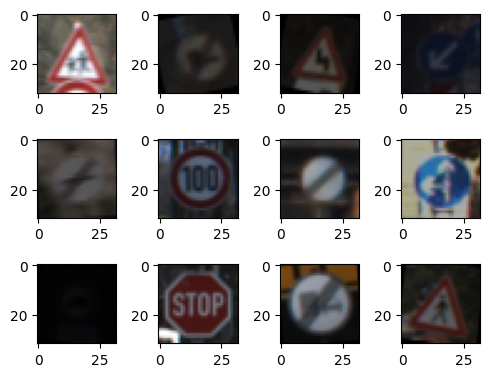

In [7]:
# x_train 일부 이미지 출력

plt.figure(figsize=(5,5)) # 그림 크기 5x5
for i in range(428,440): # 12장 출력
    plt.subplot(4,4,(i%12)+1)
    plt.imshow(x_train[i].astype(np.uint8))
    plt.tight_layout() # 각각 서브플롯 사이 간격 최적화

In [12]:
# 데이터 개수 히스토그램

import cv2

from datasets_preparing import local_histogram_equalization

train_data = pd.read_pickle(path + '\\train.pickle')
valid_data = pd.read_pickle(path + '\\valid.pickle')
test_data = pd.read_pickle(path + '\\test.pickle')
labels_data = pd.read_pickle(path + '\\labels.pickle')

train_images = train_data['features']
train_labels = train_data['labels']

valid_images = valid_data['features']
valid_labels = valid_data['labels']

test_images = test_data['features']
test_labels = test_data['labels']

print(len(train_labels))
print(len(valid_labels))
print(len(test_labels))

# train_data(local_histogram_equalization)

34799
4410
12630


In [13]:
from collections import Counter # 리스트 안에 요소별로 개수를 확인하는 방법, collections 모듈의 Counter 함수

train_labels # 이 리스트의
counted = Counter(train_labels) # 라벨별로 개수를 세어줌
print(counted) # 라벨별 개수 출력

Counter({2: 2010, 1: 1980, 13: 1920, 12: 1890, 38: 1860, 10: 1800, 4: 1770, 5: 1650, 25: 1350, 9: 1320, 7: 1290, 3: 1260, 8: 1260, 11: 1170, 35: 1080, 18: 1080, 17: 990, 31: 690, 14: 690, 33: 599, 26: 540, 15: 540, 28: 480, 23: 450, 30: 390, 16: 360, 34: 360, 6: 360, 36: 330, 22: 330, 40: 300, 20: 300, 39: 270, 21: 270, 29: 240, 24: 240, 41: 210, 42: 210, 32: 210, 27: 210, 37: 180, 19: 180, 0: 180})


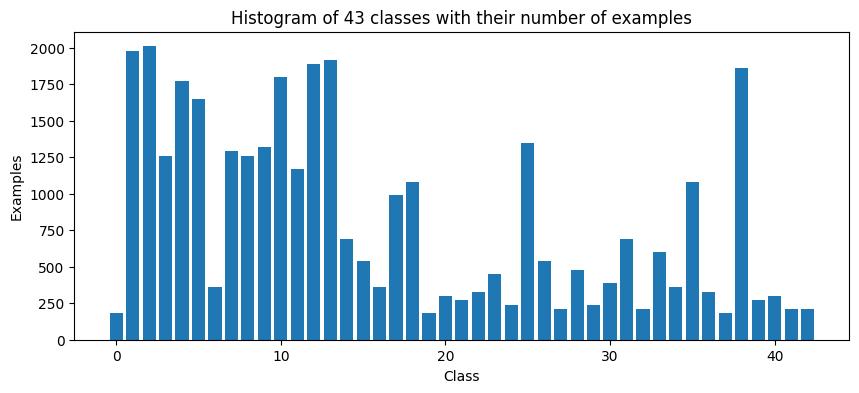

<Figure size 500x1000 with 0 Axes>

In [14]:
# 그래프 크기 조절
plt.figure(figsize=(10, 4))

# 그래프 그리기
plt.bar(counted.keys(), counted.values())

# 그래프 레이블 추가
plt.xlabel('Class')
plt.ylabel('Examples')
plt.title('Histogram of 43 classes with their number of examples')

plt.figure(figsize=(5, 10))

# 그래프 보여주기
plt.show()